# Define the Problem
- background: Popularity bias occurs because items with higher interaction frequencies (e.g., clicks, views) are over-represented, leading to skewed predictions.

- Aim: Separate the true causal effect of item features (relevance) from spurious correlations caused by popularity.

# Causal Inference Principles
To address popularity bias, use the following causal inference concepts:

1. **Confounding Variable**: Popularity acts as a confounder, influencing both the exposure of items and user interactions.
2. **Intervention**: Simulate a scenario where popularity is controlled or neutralized.
3. **Counterfactual Reasoning**: Predict user-item interactions in a world where the popularity bias is removed.

# Framework to Integrate Causal Inference into GNNs

## A. Graph Construction:

Build a bipartite graph with:
- Nodes: Users and items.
- Edges: Represent interactions, weighted by relevance or engagement metrics.
- Include popularity features (e.g., interaction frequency, rating counts) as node attributes for items.

## B. Causal Graph Modeling:

Incorporate a causal graph to explicitly model relationships:
```
User → Interaction

Item Popularity → Interaction

Item Features → Interaction
```
Use do-calculus or causal disentanglement to account for the confounding effect of item popularity.

## C. LSTM Integration to model user's **popularity susceptibility**

- Input to LSTM:
  - Each user’s interaction history is divided into intervals (e.g., periods of time, grouped by 10 interactions).
  - Each interval contains a feature vector:
    - Average Popularity: Average popularity score of items interacted with during that interval.
    - Additional Features (optional): Average rating given, diversity of genres, etc.

Use the last hidden state of the LSTM as a user feature embedding.
Combine the user embedding from the LSTM with the GNN embedding for users in the graph.

## D. Module Design

#### Factual Embedding Path
1. **GNN Encoding**
- Apply a Graph Neural Network (e.g., GCN, GAT) to learn user and item embeddings:
$$h_f = GNN(X, A)$$
where $A$ is the adjacency matrix, $X$ represents the initial node (user + item) embeddings, more specifically:

$$h_{inital-user} = [e_u || h_{u_{LSTM}}]$$

$$h_{inital-random} = [d_i || p_i ]$$

$e_u$ is random embedding, $h_{u_{LSTM}}$ is the hidden output, $d_i$ is the descrition to vector, $p_i$ is the popularity embedding

2. **Popularity Transformatio**
- Transform popularity scores using a fixed linear transformation:
$$g(P_i) = normalize(P_i)$$

####  Counterfactual Embedding Path
1. **Remove Popularity Effect**
- Subtract popularity contribution from factual embeddings:
$$h_cf = h_f - λ * g(P_i)$$
- Here, $λ$ is a hyperparameter controlling the impact of popularity.

## E. Loss Design

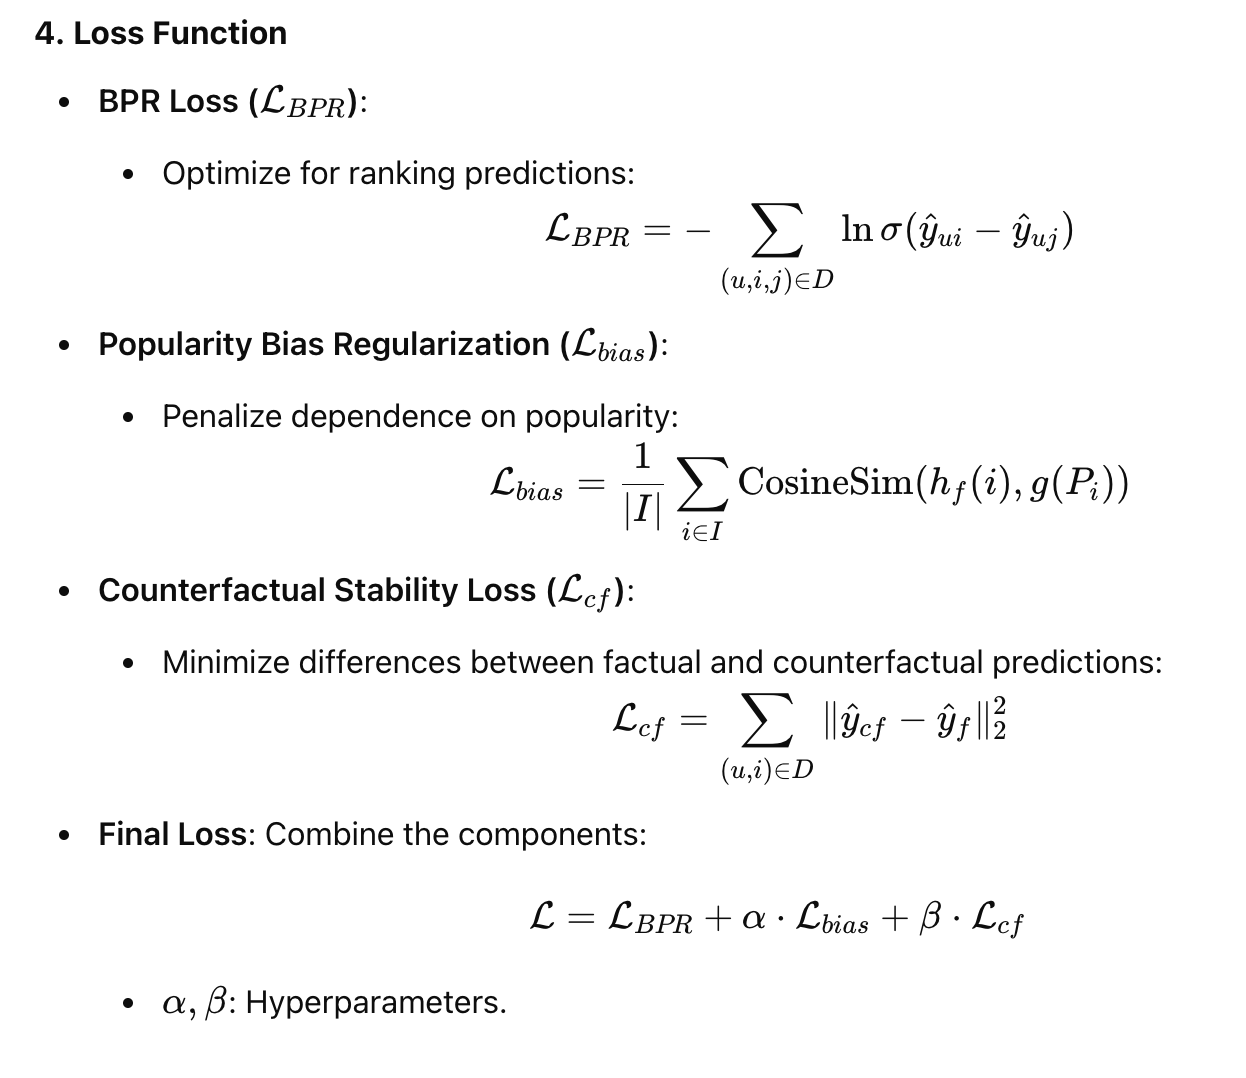
-------
| Causal Principle | 对应设计 | 解释 |
| --- | --- | --- |
| Confounding Variable | Popularity Bias Regularization | 减少物品跨入对受欢迎度的依赖,减轻混淆影响。 |
| Intervention | Counterfactual Embeddings (hcf) | 通过从实际跨入中减去受欢迎度偏差,生成一个"无受欢迎度偏差"的跨入。 |
| Counterfactual Reasoning | Counterfactual Stability Loss (Lcf) | 通过比较实际预测和反事实预测,确保模型的公平性和准确性,避免受欢迎度过度的影响。 |


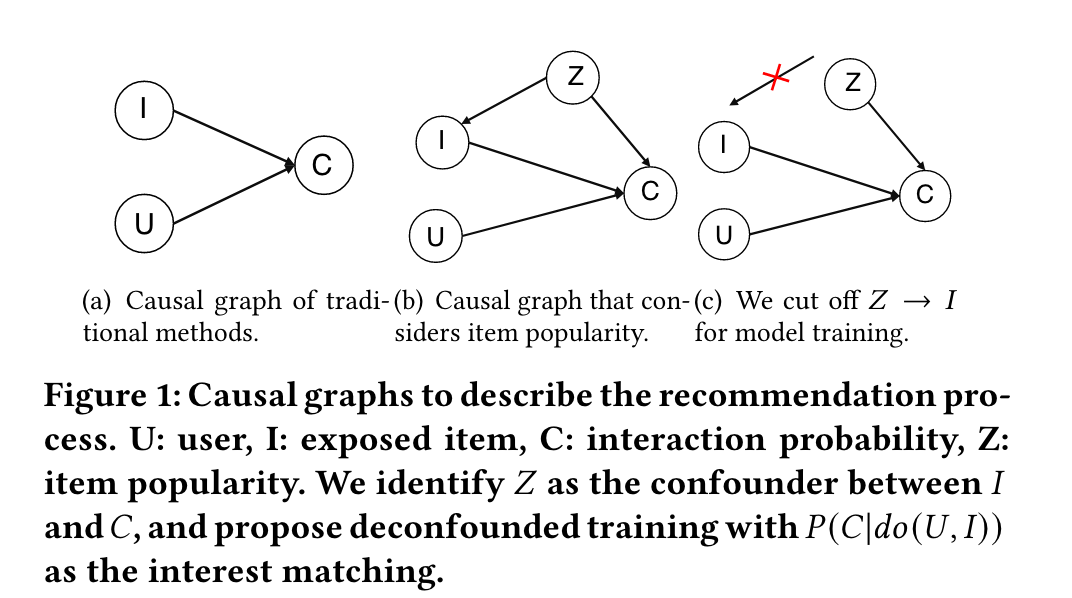